In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

from matplotlib import cm

""" import the Tilings package... """
import sys
sys.path.insert(0, '../../gaps_topology/Tilings') # prepend the path to the Tiling package
import Tilings as tl
import SKK_approximants as skk
import AB_envs as envs
import QuantumGraph as QGraph

from networkx.algorithms import bipartite


%matplotlib inline  

"""
Styling
See: http://matplotlib.org/users/customizing.html

TeX rendering:
You can use TeX to render all of your matplotlib text if the rc
parameter text.usetex is set.  This works currently on the agg and ps
backends, and requires that you have tex and the other dependencies
described at http://matplotlib.org/users/usetex.html
properly installed on your system.  The first time you run a script
you will see a lot of output from tex and associated tools.  The next
time, the run may be silent, as a lot of the information is cached in
~/.tex.cache
"""
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern'], 'size':16})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# colors
BostonBlue = np.array([0., 104., 139.])/255
comp = np.array([200., 35., 0.])/255
# linewidth of plots
rc('lines', lw = 2)
# fontsize of the labels
rc('axes', labelsize = 16)
# bbox='tight' tries to make the bounding box fit the plot area
# pad_inches is the distance between the bounding box and the plot area
# see http://matplotlib.org/users/tight_layout_guide.html
rc('savefig', bbox = 'tight', pad_inches = .1)

In [2]:
"""
Construct Pavel's approximant
"""
ninfl = 5

# construct the elementary triangle
e = np.identity(4)
orig = np.zeros(4)
ea = e[0]
eb = e[2]
B = orig
A = orig + ea
C = orig + ea + eb
t1 = [(1, (A, B, C))]
# create the approximant
approx = tl.A5(t1)
# inflate it
approx.it_sub(ninfl)
# set up the edges
skk.affect_order(approx, ninfl)
# retrieve the graph
graph = approx._graph
# projection matrices useful later
para = approx.para()
perp = approx.perp_proj()
"""
Compute the site index (useful for retrieving the wf data later)
"""
index = dict(zip(graph.nodes(), range(len(graph))))

In [3]:
"""
Construct the Hamiltonian
"""
# construct the Hamiltonians
Honsite, Hhop = skk.symmetric_hams(graph)

In [4]:
"""
Compute the height field
"""
# compute the coordinates of the apexes of the triangle
Mi = np.linalg.matrix_power(approx._M, ninfl) # inflation matrix
p10 = np.zeros(4)
p20 = np.array([1,0,1,0])
p1 = tuple(np.dot(Mi, p10))
p2 = tuple(np.dot(Mi, p20))
# compute the height field
wg = approx.integrate_arrow_field((0,0,0,0))
height = nx.get_node_attributes(wg, 'weight')
# height field: h(p2) - h(p1) = (-1)**(ninfl+1) * 2
h12 = (2*(ninfl % 2) - 1)*2

In [5]:
"""
Diagonalize it, and find lambda
"""
# Vrange = np.arange(-1., 100., .5)
# betas = []
# for V in Vrange:
#     H = Hhop + V*Honsite
#     # compute the groundstate in the symmetric representation
#     En, gs = eigsh(H, k=1, which = "SA")
#     gs = np.abs(gs.flatten())
#     # go to the real representation
#     gs = skk.torealspace(graph, gs)

#     # measure beta
#     beta = (gs[index[p2]]/gs[index[p1]])**(1./h12)
#     betas.append(beta)

'\nDiagonalize it, and find lambda\n'

In [6]:
"""
Savin' data
"""
#np.savetxt("data/Cake Nico/Vbeta_n_6.dat", list(zip(Vrange, betas2)))
#np.savetxt("data/Cake Nico/Vbeta_n_5.dat", list(zip(Vrange, betas)))

"""
Loadin' data
"""
Vrange, betas2 = np.loadtxt("data/Cake Nico/Vbeta_n_6.dat").T
Vrange, betas = np.loadtxt("data/Cake Nico/Vbeta_n_5.dat").T

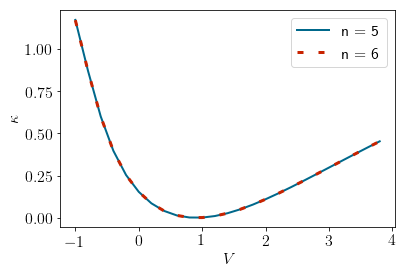

In [9]:
"""
Plottin' data
"""
kappas = -np.log(betas)
kappas2 = -np.log(betas2)
#trange = 1./(1. + Vrange)
plt.plot(Vrange[:len(kappas)], kappas, '-', c=BostonBlue)
plt.plot(Vrange, kappas2, '--', dashes=(2, 5), lw = 3, c=comp)
plt.xlabel(r"$V$")
plt.ylabel(r"$\kappa$")
plt.legend(("n = 5", "n = 6", ))
plt.savefig("../img3/kappa_n_5_6.pdf", dpi=400)

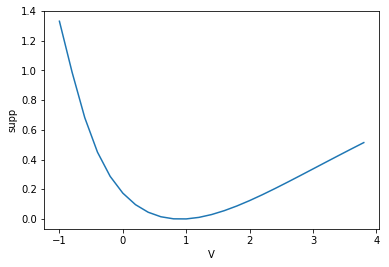

In [13]:
"""
PLot the support of the multifractal measure
"""

def supp(kappa):
    # inflation factor (depends on the tiling at hand)
    om0 = 17. + 12.*np.sqrt(2)
    return 4*np.abs(kappa)/np.log(om0)

plt.plot(Vrange, supp(kappas2), '-')
plt.xlabel("V")
plt.ylabel(r"supp")
#plt.legend(("n = 5", "n = 6", ))
plt.savefig("multifractal_support_n_6.pdf", dpi=400)

# Custom quasicrystallographic potential

In [110]:
"""
Custom on-site Hamiltonian
"""
V = {3:1., 4:0, 5:0, 6:0, 7:0, 8:0}
Hosc = skk.coord_func_ham(graph, V)

In [111]:
Vrange = np.arange(-0.5, 1.5, .2)
betas = []
for V in Vrange:
    H = Hhop + V*Hosc
    # compute the groundstate in the symmetric representation
    En, gs = eigsh(H, k=1, which = "SA")
    gs = np.abs(gs.flatten())
    # go to the real representation
    gs = skk.torealspace(graph, gs)

    # measure beta
    beta = (gs[index[p2]]/gs[index[p1]])**(1./h12)
    print(beta)
    betas.append(beta)

0.787755661007
0.815630947739
0.843872904422
0.872400021122
0.901132658857
0.929994551833
0.958913995791
0.987824705931
1.01666636178
1.04538486423


In [12]:
Vrange = np.arange(-0.5, 1.5, .2)
betas = [0.787755661007,
0.815630947739,
0.843872904422,
0.872400021122,
0.901132658857,
0.929994551833,
0.958913995791,
0.987824705931,
1.01666636178,
1.04538486423]
(betas[-1]-betas[0])/(Vrange[-1]-Vrange[0])

0.14312733512388895

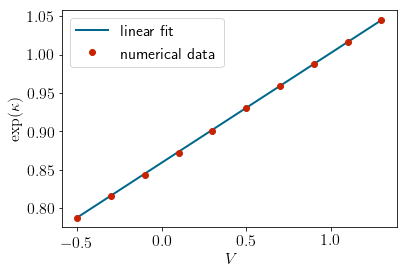

In [13]:
plt.plot(Vrange, (Vrange-Vrange[0])*0.143 + betas[0], c=BostonBlue)
plt.plot(Vrange, betas, 'o', c=comp)
# plt.plot(Vrange, betas2, '-')
plt.xlabel(r"$V$")
plt.ylabel(r"$\exp(\kappa)$")
plt.legend((r"linear fit", r"numerical data"))
plt.savefig("../img3/beta_customF_ham.pdf", dpi=400)

In [117]:
"""
Add groundstate (and other) data to the graph
"""
# associate to each node the corresponding groundstate wavefunction component
wf = dict(zip(graph.nodes(), gs))
# measure beta
beta = (wf[p2]/wf[p1])**(1./h12)
print("lambda = ", 1./beta**2.)
# remove the lambda part, only keeping the cake part
cake = [wf[p]*beta**(-height[p]) for p in graph]

# affect to each site its type (according to first neighbors environment)
siteType = {3:'F', 4:'E', 6:'C', 7:'B', 8:'A'}
index = dict(zip(graph.nodes(), range(len(graph))))
for p in graph:
    neighs = graph[p]
    # the Honsite ham gives the right coordinence
    idx = index[p]
    z = Honsite[idx, idx]
    if z in siteType.keys():
        graph.node[p]['type'] = siteType[z]
    else:
        graph.node[p]['type'] = 'D1'
        if 3 in [Honsite[index[n], index[n]] for n in neighs]:
            graph.node[p]['type'] = 'D2'
# add the cake data to the graph
nx.set_node_attributes(graph, "cake", dict(zip(graph.nodes(), cake)))
# add the exponential factor data to the graph
nx.set_node_attributes(graph, "exponential", {p:beta**height[p] for p in graph})
# add the height data to the graph
nx.set_node_attributes(graph, "height", height)
# reflect the SKK domain to obtain a bigger and more regularly spaced system
reflgraph = approx.reflect(graph, 1)

lambda =  0.915055813245


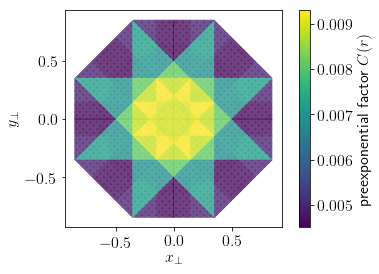

In [119]:
"""
Plot with plt.scatter (do not plot the edges, suited for large approximants)
"""

# which projection to use (para or perp)
proj = 'perp'
# which part of the wf to plot (exponential or cake)
term = 'cake'
# color the nodes according to the type of data we want
node_color = [reflgraph.node[p][term] for p in reflgraph]

s = 1.
# retrive position
pos = nx.get_node_attributes(reflgraph, proj)
x, y = np.transpose([pos[p] for p in reflgraph])
plt.scatter(x, y, s=s, c=node_color, edgecolor='', cmap="viridis", alpha=1.)
# set up the colorbar
cb = plt.colorbar()#,  ticks=[0.1, 0.12])
# title of the colorbar
if term == 'cake':
    cb.ax.set_ylabel(r'preexponential factor $C(r)$')
else:
    cb.ax.set_ylabel(r'exponential factor $\exp(\kappa h(r))$')
# custom ticks for the colorbar
#cb.ax.set_yticklabels(['Low', 'Medium'])
# axes labels
plt.xlabel(r"$x_\perp$")
plt.ylabel(r"$y_\perp$")
plt.axes().set_aspect('equal')
plt.savefig("../img3/SKK_" + term + "_" + str(ninfl) + "_" + proj + "_VF_" + str(V) + ".png", dpi=400)

# Non-quasicrystallographic potential (I)

In [5]:
ninfl = 5

# construct the elementary triangle
e = np.identity(4)
orig = np.zeros(4)
ea = e[0]
eb = e[2]
B = orig
A = orig + ea
C = orig + ea + eb
t1 = [(1, (A, B, C))]
# create the approximant
approx = tl.A5(t1)
# inflate it
approx.it_sub(ninfl)
# set up the edges
skk.affect_order(approx, ninfl)
# retrieve the graph
graph = approx._graph
# projection matrices useful later
para = approx.para()
perp = approx.perp_proj()
"""
Compute the site index (useful for retrieving the wf data later)
"""
index = dict(zip(graph.nodes(), range(len(graph))))

In [124]:
H1, H2 = skk.bipartite_hams(graph)

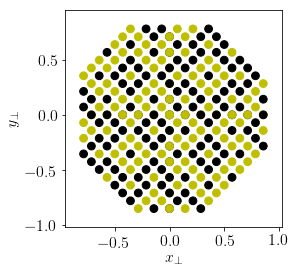

In [141]:
# coloring of the graph
coloring = bipartite.color(graph)
# color the graph nodes according according to the part they belong to
nx.set_node_attributes(graph, 'bipartite', coloring)
ugraph = approx.reflect(graph, 1)
# which projection to use (para or perp)
proj = 'perp'
# retrive position
pos = nx.get_node_attributes(ugraph, proj)
# color the nodes according to the type of data we want
# node_color = [H2[index[p],index[p]] for p in ugraph]
def color(val):
    if val == 1:
        col = 'y'
    else:
        col = 'black'
    return col
node_color = [color(ugraph.node[p]['bipartite']) for p in ugraph]

s = 60.
nx.draw_networkx(ugraph, pos, with_labels=False, node_size=s, width=0, node_color=node_color)
if proj == 'perp':
    plt.xlabel(r"$x_\perp$")
    plt.ylabel(r"$y_\perp$")
plt.axes().set_aspect('equal')
plt.savefig('../img3/bipartite.pdf')

In [6]:
"""
Import or compute the groundstate
"""
# construct the Hamiltonians
Vnqp = 1. # strength of the non-qp potential
Honsite, Hhop = skk.symmetric_hams(graph)
H1, H2 = skk.bipartite_hams(graph)
H = Vnqp*H1 + Hhop
# compute the groundstate in the symmetric representation
En, gs = eigsh(H, k=1, which = "SA")
gs = np.abs(gs.flatten())
# go to the real representation
gs = skk.torealspace(graph, gs)
# compute the coordinates of the apexes of the triangle
Mi = np.linalg.matrix_power(approx._M, ninfl) # inflation matrix
p10 = np.zeros(4)
p20 = np.array([1,0,1,0])
p1 = tuple(np.dot(Mi, p10))
p2 = tuple(np.dot(Mi, p20))

# associate to each node the corresponding groundstate wavefunction component
wf = dict(zip(graph.nodes(), gs))
# measure beta
beta = (wf[p2]/wf[p1])**(1./h12)
print("lambda = ", 1./beta**2.)
# remove the lambda part, only keeping the cake part
cake = [wf[p]*beta**(-height[p]) for p in graph]

lambda =  1.35821790196


In [7]:
"""
Add groundstate (and other) data to the graph
"""
# affect to each site its type (according to first neighbors environment)
siteType = {3:'F', 4:'E', 6:'C', 7:'B', 8:'A'}
index = dict(zip(graph.nodes(), range(len(graph))))
for p in graph:
    neighs = graph[p]
    # the Honsite ham gives the right coordinence
    idx = index[p]
    z = Honsite[idx, idx]
    if z in siteType.keys():
        graph.node[p]['type'] = siteType[z]
    else:
        graph.node[p]['type'] = 'D1'
        if 3 in [Honsite[index[n], index[n]] for n in neighs]:
            graph.node[p]['type'] = 'D2'
# add the cake data to the graph
nx.set_node_attributes(graph, "cake", dict(zip(graph.nodes(), cake)))
# add the exponential factor data to the graph
nx.set_node_attributes(graph, "exponential", {p:beta**height[p] for p in graph})
# add the height data to the graph
nx.set_node_attributes(graph, "height", height)
# reflect the SKK domain to obtain a bigger and more regularly spaced system
reflgraph = approx.reflect(graph, 1)

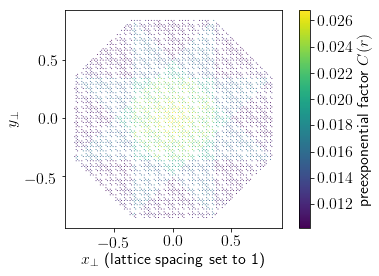

In [8]:
"""
Plot with plt.scatter (do not plot the edges, suited for large approximants)
"""
# which projection to use (para or perp)
proj = 'perp'
# which part of the wf to plot (exponential or cake)
term = 'cake'
# color the nodes according to the type of data we want
node_color = [reflgraph.node[p][term] for p in reflgraph]

s = 1.
# retrive position
pos = nx.get_node_attributes(reflgraph, proj)
x, y = np.transpose([pos[p] for p in reflgraph])
plt.scatter(x, y, s=s, c=node_color, edgecolor='', cmap="viridis", alpha=1.)
# set up the colorbar
cb = plt.colorbar()#,  ticks=[0.1, 0.12])
# title of the colorbar
if term == 'cake':
    cb.ax.set_ylabel(r'preexponential factor $C(r)$')
else:
    cb.ax.set_ylabel(r'exponential factor $\exp(\kappa h(r))$')
# custom ticks for the colorbar
#cb.ax.set_yticklabels(['Low', 'Medium'])
# axes labels
plt.xlabel(r"$x_\perp$ (lattice spacing set to 1)")
plt.ylabel(r"$y_\perp$")
plt.axes().set_aspect('equal')
plt.savefig("../img3/SKK_" + term + "_" + str(ninfl) + "_" + proj + "_Vnon_qp_" + str(Vnqp) + ".png", dpi=400)

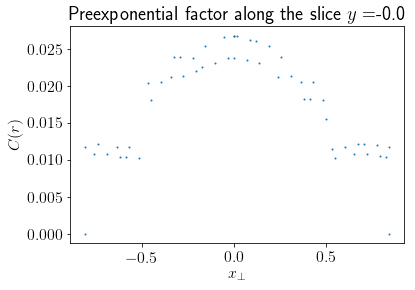

In [9]:
"""
Compute and plot the slice in one direction
"""

# which slice to plot (the slice will be made out of the points whose y coord verifies y = min {y|y>=yslice})
yslice = 0
# which projection to use (para or perp)
proj = 'perp'
# which part of the wf to plot (exponential or cake)
term = 'cake'
# color the nodes according to the type of data we want
node_color = [reflgraph.node[p][term] for p in reflgraph]

# retrive position
pos = nx.get_node_attributes(reflgraph, proj)
# keep only the positions
ppos = np.transpose([pos[p] for p in reflgraph])
# rotate by pi/4 if perp
if proj == 'perp':
    ppos = np.array([ppos[0]+ppos[1], ppos[0]-ppos[1]])/np.sqrt(2)

X, Y = ppos
Z = node_color

#X = np.around(X, 5)
# round so that all pts belonging to the same slice have the same y coordinate
Y = np.around(Y, 5)
# find the coordinate y0 of the slice we want to plot
y0 = np.max(Y)
for y in Y:
    if y >= yslice and y < y0:
        y0 = y
# select all the points belonging to the slice
Xslice = []
Zslice = []
for x, y, z in zip(X, Y, Z):
    if y == y0:
        Xslice.append(x)
        Zslice.append(z)
# sort XX by ascending order
Xslice, Zslice = zip(*sorted(zip(Xslice, Zslice)))
Xslice = list(Xslice)
Zslice = list(Zslice)
# add points at both extremeties
Xslice.insert(0,np.min(Xslice))
Xslice.append(np.max(Xslice))
Zslice.insert(0,0)
Zslice.append(0)
# plot!
plt.plot(Xslice, Zslice, 'o', ms=1., linewidth=0.7)
if proj == 'perp':
    plt.xlabel(r"$x_\perp$")
else:
    plt.xlabel(r"$x$")
if term == 'cake':
    plt.ylabel(r'$C(r)$')
else:
    plt.ylabel(r'$\exp(\kappa h(r))$')
if term == 'cake':
    plt.title(r'Preexponential factor along the slice $y = $' + str(y0))
else:
    plt.title(r'Exponential factor along the slice $y = $' + str(y0))
plt.savefig("../img3/SKK_Vnon_qp_" + term + "_slice_" + str(ninfl) + "_" + proj + ".pdf", dpi=400)

# Non-quasicrystallographic potential (II)

In [110]:
ninfl = 6

# create the approximant
approx = tl.A5(envs.squareCanonical)
# inflate it
approx.it_sub(ninfl)
# set up the edges
skk.affect_order(approx, ninfl)
# retrieve the graph
graph = approx._graph
# projection matrices useful later
para = approx.para()
perp = approx.perp_proj()
# periodize the graph
graph = QGraph.periodize(graph)
"""
Compute the site index (useful for retrieving the wf data later)
"""
index = dict(zip(graph.nodes(), range(len(graph))))

In [111]:
from scipy.sparse import csr_matrix

# perp proj
perp = nx.get_node_attributes(graph, 'perp')
# sequence of potentials
pots = []
for p in graph:
    pot = 0.
    neighs = graph.neighbors(p)
    # if p is an F site
    if len(neighs) == 3 and np.abs(perp[p][1]) <= 0.35 and perp[p][0] >= 0.5:
        # vertices linking the node to its neighbors
#         pv = np.asarray(p) # converting p to array
#         verts = [pv - n for n in neighs]
#         vert = np.sum(verts, 0)
#         angl = np.arctan2(vert[1], vert[0])
#         num = np.floor(4*angl/np.pi) + 3
#         if num == 2:
        pot = 1.

    pots.append(pot)
# construct the on-site Hamiltonian
L = len(graph)
ind = range(L)
Honsite = csr_matrix((pots, (ind, ind)), (L, L))

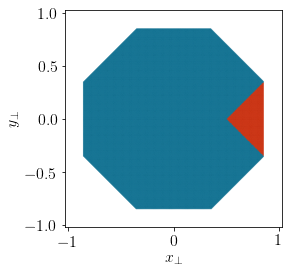

In [122]:
# coloring of the graph
coloring = {p:Honsite[index[p], index[p]] for p in graph}
# color the graph nodes according according to the part they belong to
nx.set_node_attributes(graph, 'asym', coloring)
ugraph = graph #approx.reflect(graph, 1)
# which projection to use (para or perp)
proj = 'perp'
# retrive position
pos = nx.get_node_attributes(ugraph, proj)
# color the nodes according to the type of data we want
# node_color = [H2[index[p],index[p]] for p in ugraph]
def color(val):
    if val == 1:
        col = comp
    else:
        col = BostonBlue
    return col
node_color = [color(ugraph.node[p]['asym']) for p in ugraph]

s = .1
nx.draw_networkx(ugraph, pos, with_labels=False, node_size=s, width=0, node_color=node_color)
if proj == 'perp':
    plt.xlabel(r"$x_\perp$")
    plt.ylabel(r"$y_\perp$")
plt.axes().set_aspect('equal')
plt.savefig('../img3/asym.png', dpi=300)

In [113]:
# construct the Hamiltonians
Hhop = -1.*nx.to_scipy_sparse_matrix(graph, dtype=float)
Vasym = 10.
H = Vasym*Honsite + Hhop
# compute the groundstate in the symmetric representation
En, gs = eigsh(H, k=1, which = "SA")
gs = np.abs(gs.flatten())
# compute the coordinates of the apexes of the triangle
Mi = np.linalg.matrix_power(approx._M, ninfl-1) # inflation matrix
p10 = np.zeros(4)
p20 = np.array([1,0,0,0])
p1 = tuple(np.dot(Mi, p10))
p2 = tuple(np.dot(Mi, p20))

# compute the height field
wg = approx.integrate_arrow_field((0,0,0,0))
height = nx.get_node_attributes(wg, 'weight')
# height field: h(p2) - h(p1) = (-1)**(ninfl+1) * 2
h12 = (2*(ninfl % 2) - 1)

# associate to each node the corresponding groundstate wavefunction component
wf = dict(zip(graph.nodes(), gs))
# measure beta
beta = (wf[p2]/wf[p1])**(1./(height[p2]-height[p1]))
print("lambda = ", beta**2.)
# remove the lambda part, only keeping the cake part
cake = [wf[p]*beta**(-height[p]) for p in graph]

lambda =  171.159289818


In [114]:
# add the cake data to the graph
nx.set_node_attributes(graph, "cake", dict(zip(graph.nodes(), cake)))
# add the exponential factor data to the graph
nx.set_node_attributes(graph, "exponential", {p:beta**height[p] for p in graph})
# add the height data to the graph
nx.set_node_attributes(graph, "height", {p:height[p] for p in graph})

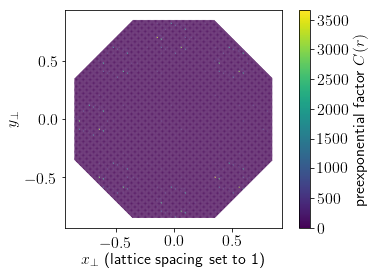

In [120]:
"""
Plot with plt.scatter (do not plot the edges, suited for large approximants)
"""

# which projection to use (para or perp)
proj = 'perp'
# which part of the wf to plot (exponential or cake)
term = 'cake'
# color the nodes according to the type of data we want
node_color = [graph.node[p][term] for p in graph]

s = 1.
# retrive position
pos = nx.get_node_attributes(graph, proj)
x, y = np.transpose([pos[p] for p in graph])
plt.scatter(x, y, s=s, c=node_color, edgecolor='', cmap="viridis", alpha=1.)
# set up the colorbar
cb = plt.colorbar()#,  ticks=[0.1, 0.12])
# title of the colorbar
if term == 'cake':
    cb.ax.set_ylabel(r'preexponential factor $C(r)$')
else:
    cb.ax.set_ylabel(r'exponential factor $\exp(\kappa h(r))$')
# custom ticks for the colorbar
#cb.ax.set_yticklabels(['Low', 'Medium'])
# axes labels
plt.xlabel(r"$x_\perp$ (lattice spacing set to 1)")
plt.ylabel(r"$y_\perp$")
plt.axes().set_aspect('equal')
plt.savefig("../img3/SKK_" + term + "_" + str(ninfl) + "_" + proj + "_Vasym_" + str(Vasym) + ".png", dpi=400)

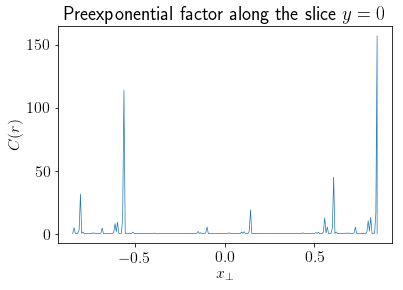

In [116]:
"""
Compute and plot the slice in one direction
"""

# which slice to plot (the slice will be made out of the points whose y coord verifies y = min {y|y>=yslice})
yslice = 0
# which projection to use (para or perp)
proj = 'perp'
# which part of the wf to plot (exponential or cake)
term = 'cake'
# color the nodes according to the type of data we want
node_color = [graph.node[p][term] for p in graph]

# retrive position
pos = nx.get_node_attributes(graph, proj)
# keep only the positions
ppos = np.transpose([pos[p] for p in graph])
# rotate by pi/4 if perp
if proj == 'perp':
    ppos = np.array([ppos[0]+ppos[1], ppos[0]-ppos[1]])/np.sqrt(2)

X, Y = ppos
Z = node_color

#X = np.around(X, 5)
# round so that all pts belonging to the same slice have the same y coordinate
Y = np.around(Y, 5)
# find the coordinate y0 of the slice we want to plot
y0 = np.max(Y)
for y in Y:
    if y >= yslice and y < y0:
        y0 = y
# select all the points belonging to the slice
Xslice = []
Zslice = []
for x, y, z in zip(X, Y, Z):
    if y == y0:
        Xslice.append(x)
        Zslice.append(z)
# sort XX by ascending order
Xslice, Zslice = zip(*sorted(zip(Xslice, Zslice)))
Xslice = list(Xslice)
Zslice = list(Zslice)
# add points at both extremeties
Xslice.insert(0,np.min(Xslice))
Xslice.append(np.max(Xslice))
Zslice.insert(0,0)
Zslice.append(0)
# plot!
plt.plot(Xslice, Zslice, '-', ms=1., linewidth=0.7)
if proj == 'perp':
    plt.xlabel(r"$x_\perp$")
else:
    plt.xlabel(r"$x$")
if term == 'cake':
    plt.ylabel(r'$C(r)$')
else:
    plt.ylabel(r'$\exp(\kappa h(r))$')
if term == 'cake':
    plt.title(r'Preexponential factor along the slice $y = 0$')
else:
    plt.title(r'Exponential factor along the slice $y = 0$')
plt.savefig("../img3/SKK_Vasym_" + term + "_slice_" + str(ninfl) + "_" + proj + ".pdf", dpi=400)

# Standard Hamiltonian

In [22]:
# a specific value of V
V = 1.
# construct the Hamiltonian
H = Hhop + V*Hosc
# compute the groundstate in the symmetric representation
En, gs = eigsh(H, k=1, which = "SA")
gs = np.abs(gs.flatten())
# go to the real representation
gs = skk.torealspace(graph, gs)

# measure beta
beta = (gs[index[p2]]/gs[index[p1]])**(1./h12)

# remove the lambda part, only keeping the cake part
cake = [gs[index[p]]*beta**(-height[p]) for p in graph]

In [23]:
"""
Add groundstate (and other) data to the graph, and reflect it
"""
# affect to each site its type (according to first neighbors environment)
siteType = {3:'F', 4:'E', 6:'C', 7:'B', 8:'A'}
index = dict(zip(graph.nodes(), range(len(graph))))
for p in graph:
    neighs = graph[p]
    # the Honsite ham gives the right coordinence
    idx = index[p]
    z = Honsite[idx, idx]
    if z in siteType.keys():
        graph.node[p]['type'] = siteType[z]
    else:
        graph.node[p]['type'] = 'D1'
        if 3 in [Honsite[index[n], index[n]] for n in neighs]:
            graph.node[p]['type'] = 'D2'
# add the cake data to the graph
nx.set_node_attributes(graph, "cake", dict(zip(graph.nodes(), cake)))
# add the height data to the graph
nx.set_node_attributes(graph, "exponential", {p:beta**height[p] for p in graph})
# reflect the SKK domain to obtain a bigger and more regularly spaced system
ugraph = approx.reflect(graph, 1)

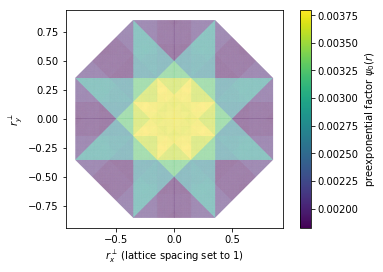

In [37]:
"""
Plot with plt.scatter (do not plot the edges, suited for large approximants)
"""

# which projection to use (para or perp)
proj = 'perp'
# which part of the wf to plot (exponential or cake)
term = 'cake'
# color the nodes according to the type of data we want
node_color = [ugraph.node[p][term] for p in ugraph]

s = .1
# retrive position
pos = nx.get_node_attributes(ugraph, proj)
x, y = np.transpose([pos[p] for p in ugraph])
plt.scatter(x, y, s=s, c=node_color, edgecolor='', cmap="viridis", alpha=1.)
# set up the colorbar
cb = plt.colorbar()#,  ticks=[0.1, 0.12])
# title of the colorbar
if term == 'cake':
    cb.ax.set_ylabel(r'preexponential factor $\psi_0(r)$')
else:
    cb.ax.set_ylabel(r'exponential factor $\exp(\kappa h(r))$')
# custom ticks for the colorbar
#cb.ax.set_yticklabels(['Low', 'Medium'])
# axes labels
plt.xlabel(r"$r^\perp_x$ (lattice spacing set to 1)")
plt.ylabel(r"$r^\perp_y$")
plt.axes().set_aspect('equal')
plt.savefig("SKK_" + term + "_" + str(ninfl) + "_" + proj + "_VcustomE_" + str(V) + ".png", dpi=400)

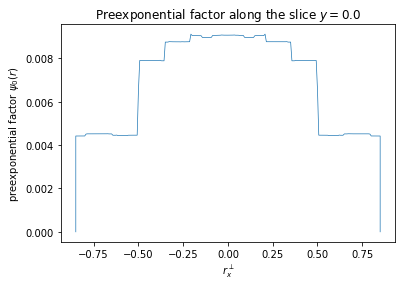

In [16]:
"""
Compute and plot the slice in one direction
"""

# which slice to plot (the slice will be made out of the points whose y coord verifies y = min {y|y>=yslice})
yslice = 0.
# which projection to use (para or perp)
proj = 'perp'
# which part of the wf to plot (exponential or cake)
term = 'cake'
# color the nodes according to the type of data we want
node_color = [ugraph.node[p][term] for p in ugraph]

# retrive position
pos = nx.get_node_attributes(ugraph, proj)
# keep only the positions
ppos = np.transpose([pos[p] for p in ugraph])
# rotate by pi/4 if perp
if proj == 'perp':
    ppos = np.array([ppos[0]+ppos[1], ppos[0]-ppos[1]])/np.sqrt(2)

X, Y = ppos
Z = node_color

#X = np.around(X, 5)
# round so that all pts belonging to the same slice have the same y coordinate
Y = np.around(Y, 5)
# find the coordinate y0 of the slice we want to plot
y0 = np.max(Y)
for y in Y:
    if y >= yslice and y < y0:
        y0 = y
# select all the points belonging to the slice
Xslice = []
Zslice = []
for x, y, z in zip(X, Y, Z):
    if y == y0:
        Xslice.append(x)
        Zslice.append(z)
# sort XX by ascending order
Xslice, Zslice = zip(*sorted(zip(Xslice, Zslice)))
Xslice = list(Xslice)
Zslice = list(Zslice)
# add points at both extremeties
Xslice.insert(0,np.min(Xslice))
Xslice.append(np.max(Xslice))
Zslice.insert(0,0)
Zslice.append(0)
# plot!
plt.plot(Xslice, Zslice, '-', ms=1., linewidth=0.7)
if proj == 'perp':
    plt.xlabel(r"$r^\perp_x$")
else:
    plt.xlabel(r"$r_x$")
if term == 'cake':
    plt.ylabel(r'preexponential factor $\psi_0(r)$')
else:
    plt.ylabel(r'exponential factor $\exp(\kappa h(r))$')
if term == 'cake':
    plt.title(r'Preexponential factor along the slice $ y = $' + str(y0))
else:
    plt.title(r'Exponential factor along the slice $ y = $' + str(y0))
plt.savefig("SKK_customE_" + term + "_slice_" + str(ninfl) + "_" + proj + ".pdf", dpi=400)

In [25]:
Xslice0, Zslice0 = (Xslice, Zslice)

In [26]:
beta

1.002246327785131

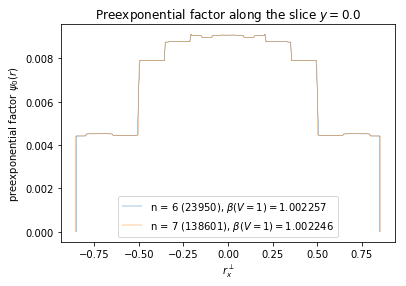

In [36]:
"""
Compute and plot the slice in one direction
"""

# which slice to plot (the slice will be made out of the points whose y coord verifies y = min {y|y>=yslice})
yslice = 0.
# which projection to use (para or perp)
proj = 'perp'
# which part of the wf to plot (exponential or cake)
term = 'cake'
# color the nodes according to the type of data we want
node_color = [ugraph.node[p][term] for p in ugraph]

# retrive position
pos = nx.get_node_attributes(ugraph, proj)
# keep only the positions
ppos = np.transpose([pos[p] for p in ugraph])
# rotate by pi/4 if perp
if proj == 'perp':
    ppos = np.array([ppos[0]+ppos[1], ppos[0]-ppos[1]])/np.sqrt(2)

X, Y = ppos
Z = node_color

#X = np.around(X, 5)
# round so that all pts belonging to the same slice have the same y coordinate
Y = np.around(Y, 5)
# find the coordinate y0 of the slice we want to plot
y0 = np.max(Y)
for y in Y:
    if y >= yslice and y < y0:
        y0 = y
# select all the points belonging to the slice
Xslice = []
Zslice = []
for x, y, z in zip(X, Y, Z):
    if y == y0:
        Xslice.append(x)
        Zslice.append(z)
# sort XX by ascending order
Xslice, Zslice = zip(*sorted(zip(Xslice, Zslice)))
Xslice = list(Xslice)
Zslice = list(Zslice)
# add points at both extremeties
Xslice.insert(0,np.min(Xslice))
Xslice.append(np.max(Xslice))
Zslice.insert(0,0)
Zslice.append(0)
# plot!
plt.plot(Xslice0, Zslice0, '-', ms=1., linewidth=0.4)
norm = (np.max(Zslice0)/np.max(Zslice))
plt.plot(Xslice, norm*np.asarray(Zslice), '-', ms=1., linewidth=0.4)
if proj == 'perp':
    plt.xlabel(r"$r^\perp_x$")
else:
    plt.xlabel(r"$r_x$")
if term == 'cake':
    plt.ylabel(r'preexponential factor $\psi_0(r)$')
else:
    plt.ylabel(r'exponential factor $\exp(\kappa h(r))$')
if term == 'cake':
    plt.title(r'Preexponential factor along the slice $ y = $' + str(y0))
else:
    plt.title(r'Exponential factor along the slice $ y = $' + str(y0))
plt.legend((r"n = 6 (23950), $\beta(V=1) = 1.002257$", r"n = 7 (138601), $\beta(V=1) = 1.002246$"))
plt.savefig("SKK_customE_compare_" + term + "_slice_" + str(ninfl) + "_" + proj + ".pdf", dpi=400)

In [32]:
norm = (np.max(Zslice0)/np.max(Zslice))

# Varying number of inflations

In [3]:
"""
Construct Pavel's approximant
"""
# construct the elementary triangle
e = np.identity(4)
orig = np.zeros(4)
ea = e[0]
eb = e[2]
B = orig
A = orig + ea
C = orig + ea + eb
t1 = [(1, (A, B, C))]
# create the approximant
approx = tl.A5(t1)

In [4]:
V = -.5
nstart = 4
nstop = 8
bets = []
for ninfl in range(nstart, nstop):
    # inflate it
    approx.it_sub(ninfl)
    # set up the edges
    skk.affect_order(approx, ninfl)
    # retrieve the graph
    graph = approx._graph
    # projection matrices useful later
    para = approx.para()
    perp = approx.perp_proj()
    """
    Construct the Hamiltonian
    """
    # construct the Hamiltonians
    Honsite, Hhop = skk.symmetric_hams(graph)
    H = Hhop + V*Honsite
    """
    Compute the height field
    """
    # compute the coordinates of the apexes of the triangle
    Mi = np.linalg.matrix_power(approx._M, ninfl) # inflation matrix
    p10 = np.zeros(4)
    p20 = np.array([1,0,1,0])
    p1 = tuple(np.dot(Mi, p10))
    p2 = tuple(np.dot(Mi, p20))
    # compute the height field
    wg = approx.integrate_arrow_field((0,0,0,0))
    height = nx.get_node_attributes(wg, 'weight')
    # height field: h(p2) - h(p1) = (-1)**(ninfl+1) * 2
    h12 = (2*(ninfl % 2) - 1)*2
    """
    Compute the site index (useful for retrieving the wf data later)
    """
    index = dict(zip(graph.nodes(), range(len(graph))))
    """
    Diagonalize and find lambda
    """
    # compute the groundstate in the symmetric representation
    En, gs = eigsh(H, k=1, which = "SA")
    gs = np.abs(gs.flatten())
    # go to the real representation
    gs = skk.torealspace(graph, gs)
    """
    Savin'
    """
    np.save("data/groundstate_AB_changing_V_Pavel/V_" + str(V) + "_gen_" + str(ninfl), gs)

    # measure beta
    beta = (gs[index[p2]]/gs[index[p1]])**(1./h12)
    bets.append(beta)
    print(len(approx._graph))
    print("computed groundstate, n = ", str(ninfl), "beta  = ", str(beta))
lambdas = 1./np.asarray(bets)**2.

747
computed groundstate, n =  4 beta  =  0.613468438192
4180
computed groundstate, n =  5 beta  =  0.612149463229
23950
computed groundstate, n =  6 beta  =  0.612524022443
138601
computed groundstate, n =  7 beta  =  0.612492445333


In [8]:
lambdas - np.asarray(lbp[3:])

array([ -3.57303076e-11,   4.85977480e-10,  -5.61426838e-09])

In [7]:
lbp = [1.31023580279858,
1.36478815968518,
1.35739594032671,
1.35821790197493,
1.35805783747795,
1.358080370292831]

In [4]:
kappas = -np.log(bets)
kappas

array([ 0.15308674,  0.15302781,  0.1530361 ])

In [7]:
# lambda for Penrose (see article)
lbpenrose = np.array([1.02148646, 1.02187041, 1.0217215])
spenrose = [9045, 23490, 61191]

In [13]:
En, gs = eigsh(H, k=1, which = "SA")
gs = np.abs(gs.flatten())
# go to the real representation
gs = skk.torealspace(graph, gs)
"""
Savin'
"""
np.save("data/groundstate_AB_changing_V_Pavel/V_" + str(V) + "_gen_" + str(ninfl), gs)


In [14]:
len(gs)

805443